## Building an Effective Movie Recommendation System

## Business Understanding: 

## Introduction
In the vast world of movies available today, choosing what to watch
can be overwhelming. Movie recommendation systems have become
essential tools, helping people discover movies that match their
preferences.
This realm of movie recommendation systems aims to create a user friendly and efficient model for suggesting movies based on individual
tastes.
Moreover, recommending movies that resonate with individual preferences is key to enhancing user satisfaction. This revolves around constructing an efficient movie recommendation system using the MovieLens dataset. The aim is to create a model that intelligently suggests the top 5 movies to a user based on their ratings of other movies, ultimately providing a tailored movie-watching experience.

## Problem Statement

The challenge at hand is to develop an intelligent recommendation system that addresses the issue of choice overload for users. With an extensive array of movies available, users often struggle to decide what to watch. Our objective is to simplify this process by utilizing data-driven approaches to recommend movies that align with users' tastes, thus enhancing user engagement and overall platform satisfaction.

## Defining a Metric of Success

The primary metric of success is user engagement and satisfaction, measured through:
Click-through rates**: The percentage of users who click on recommended movies compared to the total recommendations provided.
- **User ratings**: The average rating given by users to recommended movies.
- **Retention rates**: The percentage of users who continue using the platform after receiving recommendations.
- **Feedback quality**: The relevance and helpfulness of user feedback regarding the recommended movies.

## Objectives

### Main Objectives:
1. **Enhanced User Experience**: Create a recommendation system that significantly improves the movie-watching experience for users by suggesting movies that align with their preferences.

2. **Increased User Engagement**: Increase user engagement by providing personalized movie recommendations, resulting in higher user interactions and satisfaction.

### Specific Objectives:
1. **Algorithm Development**: Build and fine-tune recommendation algorithms to ensure accurate and diverse movie suggestions.

2. **User Interaction Enhancement**: Design an intuitive and engaging interface for users to provide movie ratings, enabling better recommendations.

3. **Feedback Utilization**: Establish a feedback loop to gather and integrate user feedback, continuously improving the recommendation model.

## Data Understanding

The foundation of this recommendation system is the MovieLens dataset from the GroupLens research lab at the University of Minnesota. This "classic" dataset contains 100,000 user ratings, providing essential insights into user preferences and movie interactions. Understanding the structure and characteristics of this dataset is vital for building an effective recommendation model.

In conclusion, this business understanding provides a comprehensive framework for developing an intelligent movie recommendation system. By focusing on enhancing user experience, engagement, and leveraging the valuable MovieLens dataset, we aim to create a recommendation system that not only simplifies movie selection but also fosters a more enjoyable and tailored movie-watching journey for users.

# Importing the relevant libraries

In [1]:
# Importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from  scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.linalg import svds
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD



import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the links csv
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
links.shape

(9742, 3)

In [4]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [5]:
# loading the movies csv
movies = pd.read_csv('movies.csv')
movies.head(10)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
movies.shape

(9742, 3)

In [7]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
# looking for null values in movies
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
# Loading the ratings csv
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
ratings.shape

(100836, 4)

In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
# null values in ratings
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
# Loading the tags csv
tags = pd.read_csv('tags.csv')
tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [14]:
tags.shape

(3683, 4)

In [15]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


# Merging data

merging the ratings and the movies dataset on the movieId column to form one

In [16]:
df = pd.merge(movies, ratings, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [17]:
# shape of the merged dataframe
df.shape

(100836, 6)

In [18]:
# info of the merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [19]:
# looking for null values in df
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [20]:
# looking for  any duplicates
df.duplicated().sum()

0

In [21]:
# dropping the timestamp column
df.drop('timestamp', axis=1, inplace=True)

In [22]:
# available columns in df
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating'], dtype='object')

In [23]:
# descriptive statistics of df
df.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


## Exploratory Data Analysis

In this section, I will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends, or outliers that may exist.

We will use descriptive statistics and visualizations to summarize the data and examine the relationships between the predictors and the target variable. 

We will check whether the distribution is normal and the correlation of variables and identify the potential merits or problems for the data analysis.

### Univariate Analysis

This refers to analysis of one variable. Its purpose is to understand the distribution of values for a single variable. The most common way to use the analysis to describe a variable using summary statistics that is measures of central tendency eg mean, median, mode etc.

In [24]:
# know the total number of genres are in the dataset
df['genres'].nunique()

951

In [25]:
# know the total number of titles are in the dataset
df['title'].nunique()

9719

In [26]:
# know the total number of users are in the dataset
df['userId'].nunique()

610

In [27]:
# know the total number of movies are in the dataset

df['movieId'].nunique()

9724

In [28]:
# knowing the count of movies rated by each user
df['userId'].value_counts()


userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: count, Length: 610, dtype: int64

In [29]:
#the average number of users available in the dataset
df['userId'].value_counts().mean()

165.30491803278687

In [30]:
# knowing the count of each movie rated by each user
df['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: count, Length: 9724, dtype: int64

In [31]:
#the aggregate of movies available in the dataset
df['movieId'].value_counts().mean()

10.369806663924312

In [32]:
# knowing the total count of ratings of movies rated by each user
df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [33]:
# the aggregate of ratings available in the dataset
df['rating'].value_counts().mean()

10083.6

In [34]:
# average ratings per user in the dataset
df.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

Getting the aggregate of the most and least rated movies 

In [35]:
# Average rating 
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()
# Rating counts
ratings['rating_counts']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

# Sorting the ratings DataFrame by 'rating' column in descending order
sorted_ratings = ratings.sort_values(by='rating', ascending=False)

top_5_ratings = sorted_ratings.head(5)

# Display the last 5 rows (lowest average ratings)
bottom_5_ratings = sorted_ratings.tail(5)

# Print the top 5 and bottom 5 ratings
print("Top 5 Ratings:")
print(top_5_ratings)
print("\nBottom 5 Ratings:")
print(bottom_5_ratings)

Top 5 Ratings:
                                     rating  rating_counts
title                                                     
Gena the Crocodile (1969)               5.0              1
True Stories (1986)                     5.0              1
Cosmic Scrat-tastrophe (2015)           5.0              1
Love and Pigeons (1985)                 5.0              1
Red Sorghum (Hong gao liang) (1987)     5.0              1

Bottom 5 Ratings:
                                         rating  rating_counts
title                                                         
Don't Look Now (1973)                       0.5              1
Journey 2: The Mysterious Island (2012)     0.5              1
Joe Dirt 2: Beautiful Loser (2015)          0.5              1
Jesus Christ Vampire Hunter (2001)          0.5              1
Fullmetal Alchemist 2018 (2017)             0.5              1


This shows the top users who have rated the most movies

In [36]:
df.groupby('userId')['rating'].mean().sort_values(ascending=False).head()

userId
53     5.000000
251    4.869565
515    4.846154
25     4.807692
30     4.735294
Name: rating, dtype: float64

Getting the total sum of ratings in each and every movie that was rated in the dataset

In [37]:
#getting the total sum of ratings of each movie 
top_5_most_rated_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)
print("The top most rated movies are :", top_5_most_rated_movies)
print()
print()

last_5_least_rated_movies= df.groupby('title')['rating'].count().sort_values(ascending=False).tail(5)
print("The last 5 least rated movies are:", last_5_least_rated_movies)


The top most rated movies are : title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64
-------------------------------------------------------------
The last 5 least rated movies are: title
King Solomon's Mines (1950)                  1
King Solomon's Mines (1937)                  1
King Ralph (1991)                            1
King Kong Lives (1986)                       1
À nous la liberté (Freedom for Us) (1931)    1
Name: rating, dtype: int64


Grouping  by 'movieId' and counting the number of ratings for each movie

In [38]:
# Group by 'movieId' and count the number of ratings for each movie
ratings_per_movie = df.groupby('movieId')['rating'].count().reset_index()

# Rename the columns for clarity
ratings_per_movie.columns = ['movieId', 'num_ratings']

# Print the number of ratings per movie
print(ratings_per_movie)

      movieId  num_ratings
0           1          215
1           2          110
2           3           52
3           4            7
4           5           49
...       ...          ...
9719   193581            1
9720   193583            1
9721   193585            1
9722   193587            1
9723   193609            1

[9724 rows x 2 columns]


# Data Visualization

visualizing the total count of ratings of movies

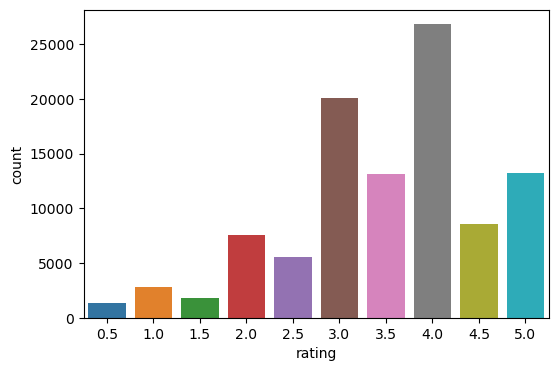

In [39]:
#  ratings distribution of movies in df
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df)
plt.show()


Only a few movies have a lower rating as the ratings below avarage (ie 2.5) are minimal than those above 2.5. Therefore its right to say that they provide great movies and great services.

Visualizing the frequency at which each movie has been rated.

In [40]:
# get rating frequency
movies_count_df = pd.DataFrame(df.groupby('title').size(), columns=['count'])
movies_count_df.head()

,count
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2


Text(0, 0.5, 'number of ratings')

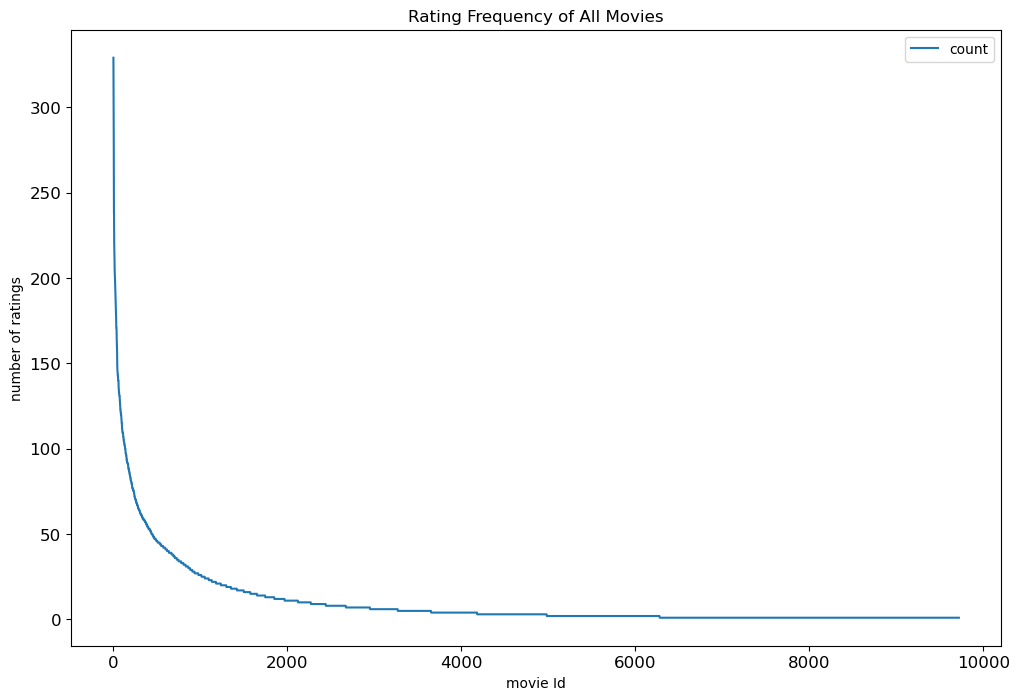

In [41]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

The distribution of ratings among movies often satisfies a property in real-world settings, which is referred to as the long-tail property. 

According to this property, only a small fraction of the items are rated frequently. Such items are referred to as popular items. The vast majority of items are rated rarely. This results in a highly skewed distribution of the underlying ratings.

# Data Transformation

Transforming data available in the dataset into more readable formats

1: Genre column 

It contains multiple genres separated by pipe (|) characters. We need to split these and count the number of unique genres.  



A list of all the genres available

In [42]:
# getting the unique genres
genres = df['genres'].unique()
genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [43]:
# count of the most rated genres in df
df.groupby('genres')['rating'].count().sort_values(ascending=False).head(10)

genres
Comedy                       7196
Drama                        6291
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: rating, dtype: int64

Splitting the genres column into a list genres and later deleting the genres column

In [44]:
# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split('|')

# Create a set of all genres in the dfset
genres = set([genre for movie_genres in df['genres'] for genre in movie_genres])

# Create a binary column for each genre
for genre in genres:
    df[genre] = df['genres'].apply(lambda x: int(genre in x))

# Drop the original genres column
df.drop('genres', axis=1, inplace=True)


In [45]:
df.columns

Index(['movieId', 'title', 'userId', 'rating', 'IMAX', 'Action', 'Comedy',
       'Western', 'Thriller', 'Documentary', '(no genres listed)', 'Children',
       'Drama', 'Fantasy', 'Horror', 'Romance', 'Sci-Fi', 'Crime', 'Animation',
       'War', 'Adventure', 'Musical', 'Film-Noir', 'Mystery'],
      dtype='object')

finding the total number of ratings per genre 

In [46]:
# List of genres
genres_list = ['Romance', 'Musical', 'Film-Noir', 'Mystery', 'Children', 'Action', 'Horror', 'Animation',
               'Fantasy', 'Adventure', 'War', 'Comedy', 'Drama', 'Thriller', 'Crime', 'IMAX', 'Documentary',
               'Western', 'Sci-Fi', '(no genres listed)']

# Calculate total ratings for each genre
total_ratings_per_genre = df[genres_list].sum()

print("Total ratings per genre:")
print(total_ratings_per_genre)



Total ratings per genre:
Romance               18124
Musical                4138
Film-Noir               870
Mystery                7674
Children               9208
Action                30635
Horror                 7291
Animation              6988
Fantasy               11834
Adventure             24161
War                    4859
Comedy                39053
Drama                 41928
Thriller              26452
Crime                 16681
IMAX                   4145
Documentary            1219
Western                1930
Sci-Fi                17243
(no genres listed)       47
dtype: int64


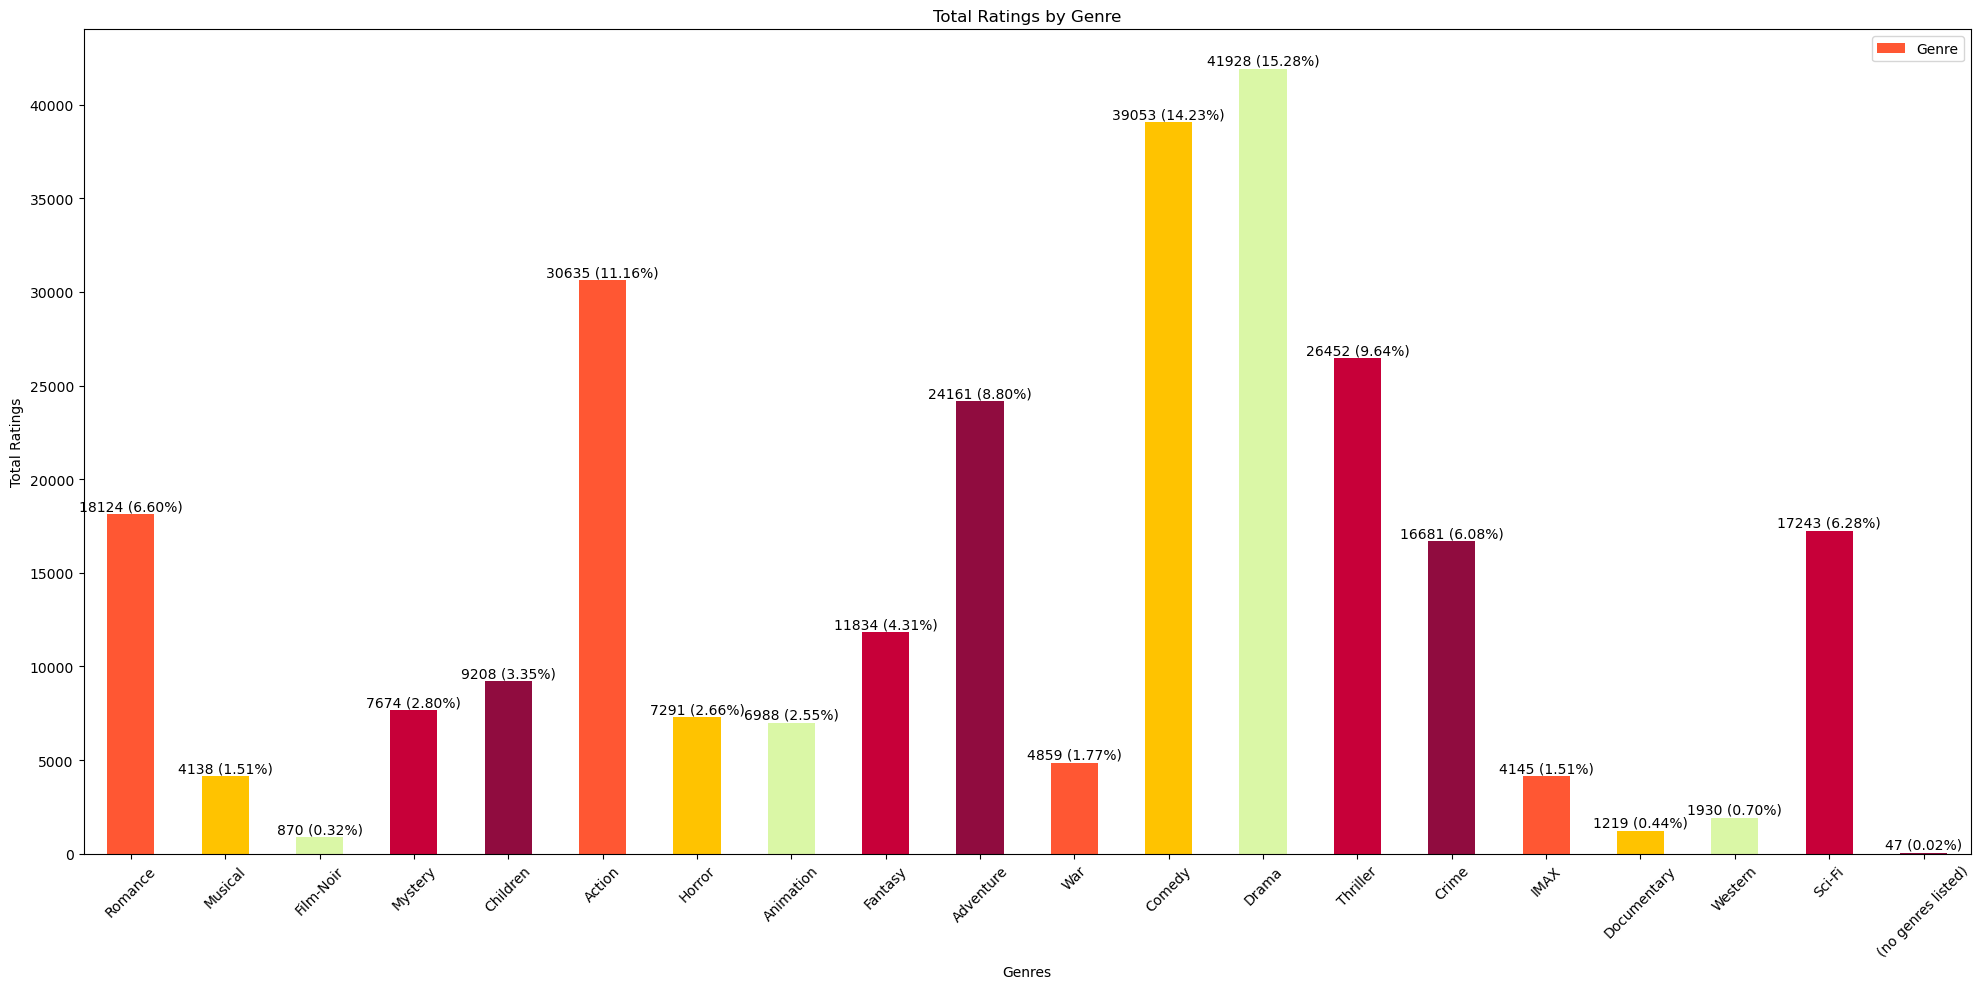

In [47]:
# Calculate the total number of ratings
total_ratings = total_ratings_per_genre.sum()

# Calculate the percentage of ratings for each genre
percentage_per_genre = (total_ratings_per_genre / total_ratings) * 100

color_palette = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F']

# Plot the bar chart with the specified color palette
plt.figure(figsize=(20, 10))
ax = total_ratings_per_genre.plot(kind='bar', color=color_palette)

# Annotate each bar with its percentage
for i, v in enumerate(total_ratings_per_genre):
    ax.text(i, v + 50, f'{v} ({percentage_per_genre[i]:.2f}%)', ha='center', va='bottom')

plt.xlabel('Genres')
plt.ylabel('Total Ratings')
plt.title('Total Ratings by Genre')
plt.xticks(range(len(genres_list)), genres_list, rotation=45)
plt.tight_layout()

# Add a legend with the corresponding colors
legend_labels = ['Genre']
ax.legend(legend_labels, loc='upper right', fontsize='medium')

plt.show()


Text(0, 0.5, 'count of rating')

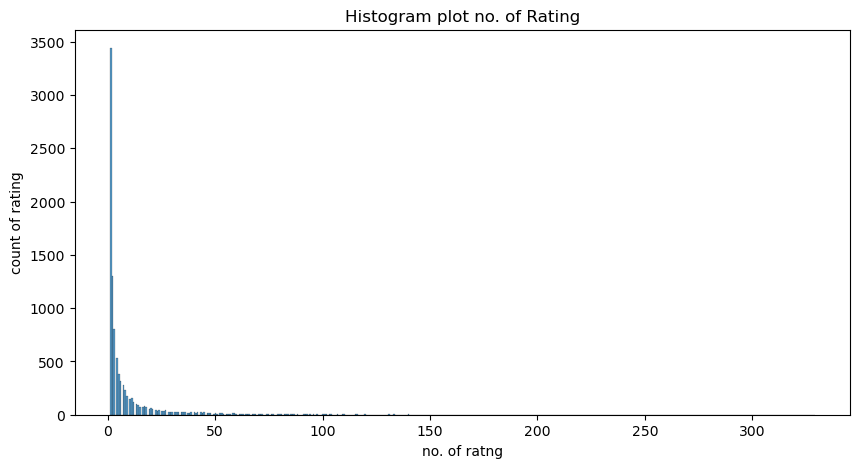

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating_counts'])
plt.title("Histogram plot no. of Rating")
plt.xlabel('no. of ratng')
plt.ylabel('count of rating')

Zero is the highest count because the genres have been divide and the ratings have been distributed among them

2: Years column

Years column in movies dataframe is not in proper format. It should be in YYYY format. we will extract the year from title column and create a new column year in the dataframe.


Separating the years from the titles column

In [49]:
# getting the year from the title column
df['year'] = df['title'].str.extract('(\(\d\d\d\d\))',expand=False)
# Convert the 'year' column to integers
df['year'] = df['year'].str.extract('(\d\d\d\d)',expand=False)
df['title'] = df.title.str.replace('(\(\d\d\d\d\))', '')
df['title'] = df['title'].apply(lambda x: x.strip())

df.head()

,movieId,title,userId,rating,IMAX,Action,Comedy,Western,Thriller,Documentary,...,Romance,Sci-Fi,Crime,Animation,War,Adventure,Musical,Film-Noir,Mystery,year
0,1,Toy Story (1995),1,4.0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1995
1,1,Toy Story (1995),5,4.0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1995
2,1,Toy Story (1995),7,4.5,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1995
3,1,Toy Story (1995),15,2.5,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1995
4,1,Toy Story (1995),17,4.5,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1995


In [50]:
# knowing the data types of the year column
print(df['year'].dtypes)

object


In [51]:
# checking for null values in year column
df['year'].isnull().sum()

18

In [52]:
# dropping the null values in year column
df.dropna(inplace=True)


In [53]:
# converting years from objects into integers
df['year'] = df['year'].astype(int)
# printing to know the data type of the year column only
print(df['year'].dtypes)

int32


In [54]:
# find the years with the most number of released movies in the dataset
df.groupby('year')['title'].count().sort_values(ascending=False).head(10)


year
1995    6144
1994    5296
1999    4536
1996    4509
2000    4268
2001    3914
1993    3741
1997    3643
2002    3642
1998    3557
Name: title, dtype: int64

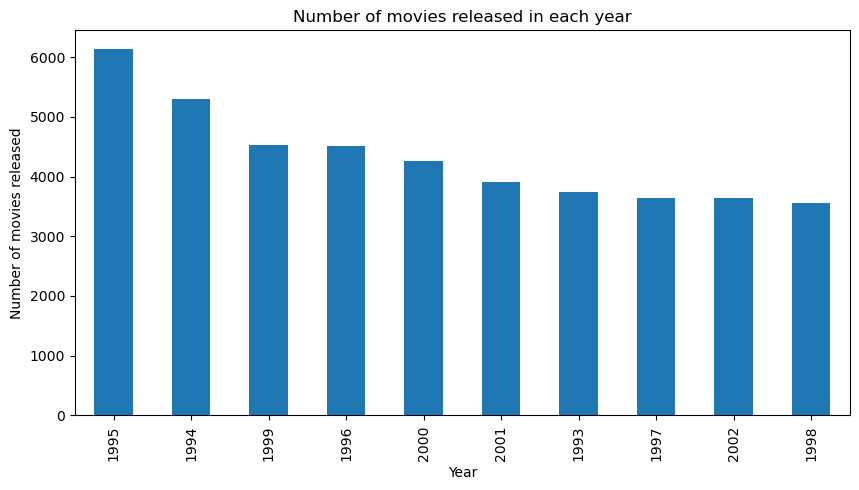

In [55]:
# a plot of the top 10 years with the most number of released movies in the dataset
df.groupby('year')['title'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Number of movies released in each year')
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.show()

In [56]:
# getting years with the least released number of movies    
df.groupby('year')['title'].count().sort_values(ascending=False).tail(10)


year
1923    7
1924    6
1916    5
1902    5
1921    5
1903    2
1919    1
1917    1
1915    1
1908    1
Name: title, dtype: int64

In [57]:
# knowing the movie that was released in 1908
df[df['year'] == '1908']


,movieId,title,userId,rating,IMAX,Action,Comedy,Western,Thriller,Documentary,...,Romance,Sci-Fi,Crime,Animation,War,Adventure,Musical,Film-Noir,Mystery,year


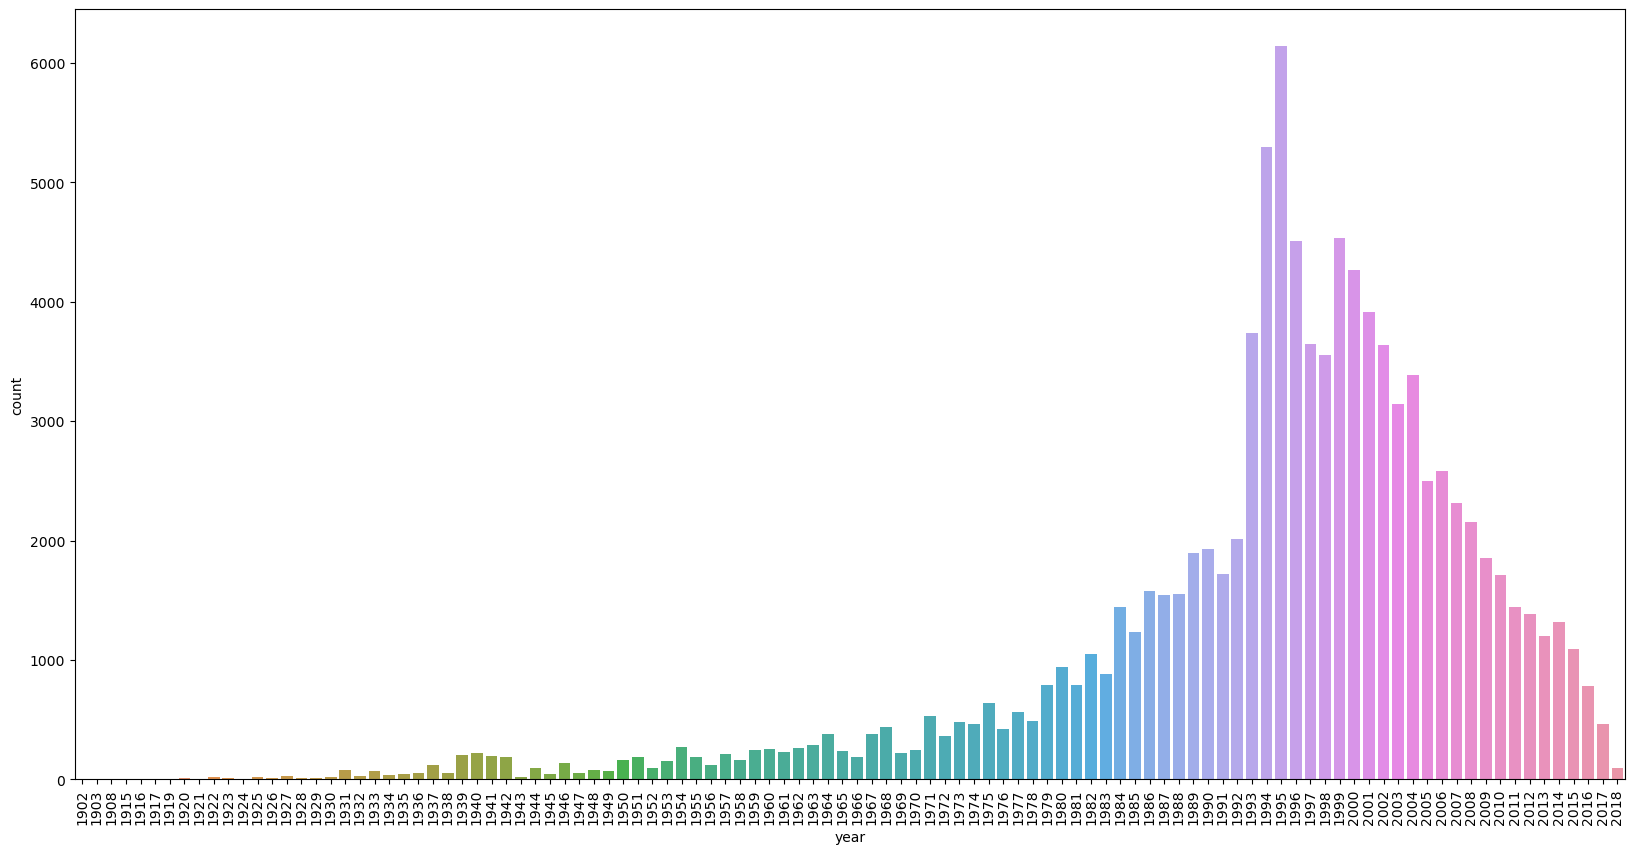

In [58]:
# plotting the count of ratings per year in a range of years
plt.figure(figsize=(20,10))
sns.countplot(x='year', data=df)
plt.xticks(rotation=90)
plt.show()

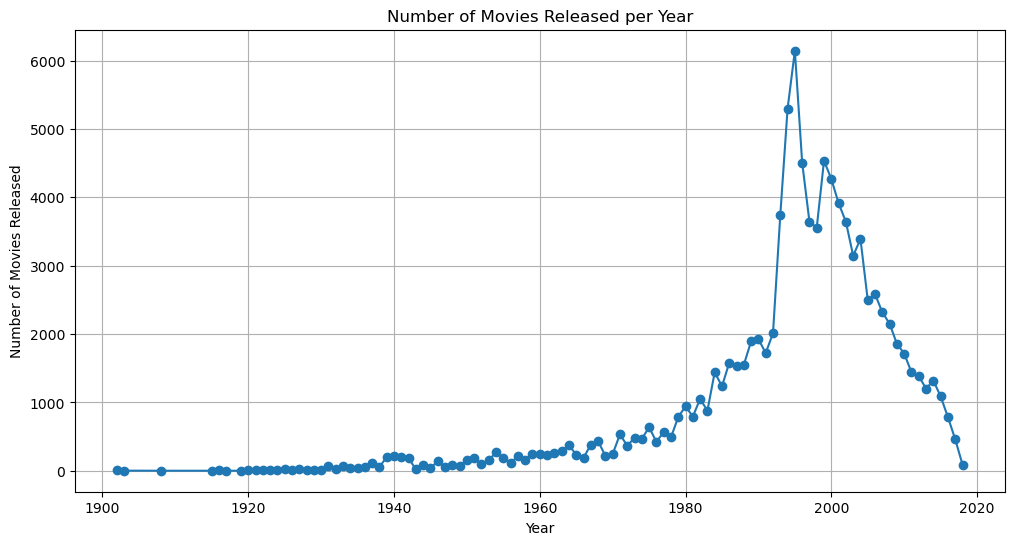

In [59]:
# Time series ploting to see trends in movie releases over the years

# Group by 'year' and count the number of movies released each year
movies_per_year = df.groupby('year').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.grid(True)
plt.show()

Correlation Matrix

we calculate the correlation matrix to see how the ratings are correlated with each other and the heatmap to visualize the correlation matrix.  

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.  

We can see that the correlation between the ratings of movies is very low. This means that the ratings of a movie are not correlated with the ratings of other movies. This is expected because different users have different tastes and preferences. 

In [60]:
# Calculate the correlation matrix 
non_numeric_columns = ['title']  
numerical_df = df.drop(non_numeric_columns, axis=1)

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()
correlation_matrix.head()


,movieId,userId,rating,IMAX,Action,Comedy,Western,Thriller,Documentary,(no genres listed),...,Romance,Sci-Fi,Crime,Animation,War,Adventure,Musical,Film-Noir,Mystery,year
movieId,1.000000,0.006838,-0.004254,0.233793,0.072398,-0.036409,-0.017348,-0.010528,0.057013,0.069952,...,-0.073597,0.076934,-0.015957,0.074820,-0.026770,0.047178,-0.053224,-0.022833,-0.001716,0.512398
userId,0.006838,1.000000,-0.049313,-0.001056,-0.006783,-0.007913,-0.009768,-0.006412,0.009240,0.002411,...,-0.001313,0.003051,-0.014791,-0.011917,-0.011474,-0.012036,-0.000932,0.001064,-0.003022,-0.014224
rating,-0.004254,-0.049313,1.000000,0.023201,-0.033938,-0.089101,0.011043,-0.004467,0.031439,-0.002264,...,0.002236,-0.019900,0.066957,0.033614,0.066217,0.003811,0.012333,0.037462,0.036050,-0.084047
IMAX,0.233793,-0.001056,0.023201,1.000000,0.146383,-0.123325,-0.023095,-0.008101,-0.016966,-0.003968,...,-0.060253,0.147860,-0.020410,0.089236,-0.024204,0.180768,0.051335,-0.019319,0.002165,0.181693
Action,0.072398,-0.006783,-0.033938,0.146383,1.000000,-0.245545,0.035510,0.260323,-0.068151,-0.012658,...,-0.187732,0.319938,0.099416,-0.096219,0.068243,0.327207,-0.121235,-0.040882,-0.054291,0.117033


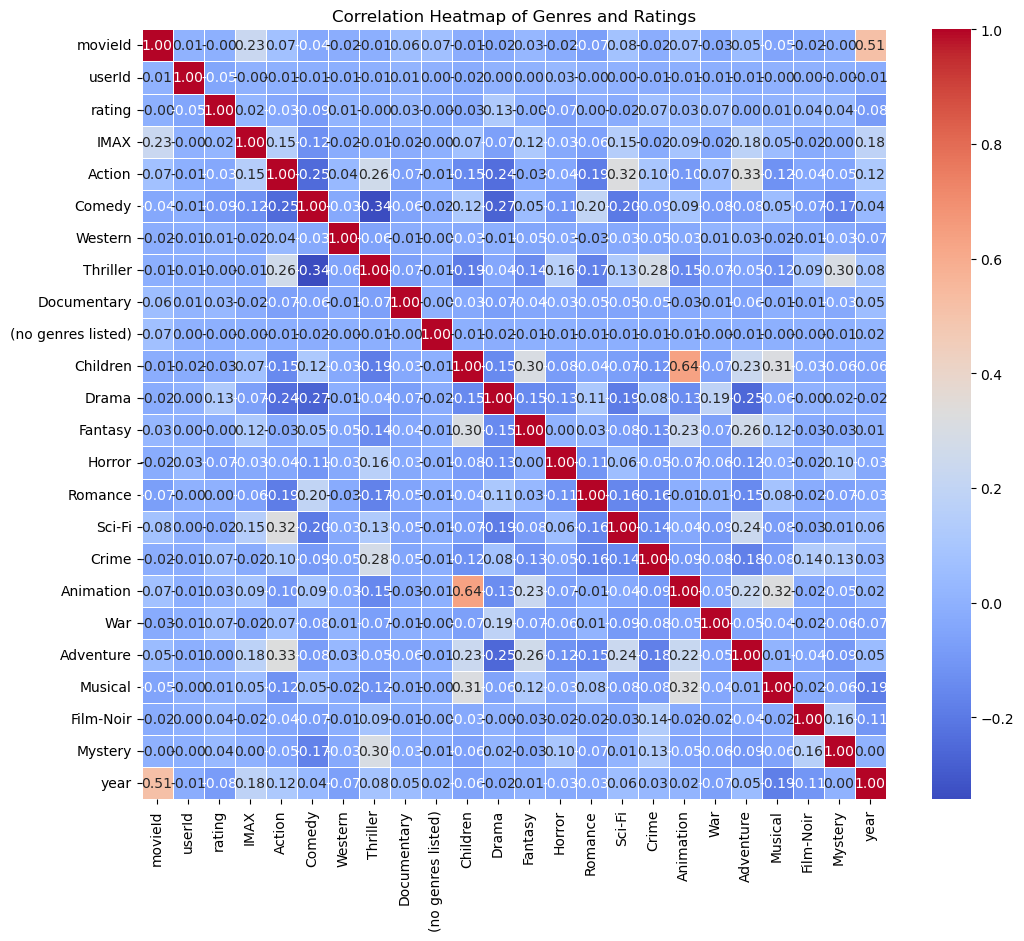

In [61]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Genres and Ratings')
plt.show()

Outlier Detection and Removal using IQR Score Method 

we detect outliers using the IQR score method and remove them from the dataset. 

The IQR score method involves calculating the IQR score, which is the difference between the 75th and 25th percentiles. 
We then multiply the IQR score by 1.5 and add it to the 75th percentile and subtract it from the 25th percentile. 
Any data points outside of these limits are considered outliers and removed from the dataset. 

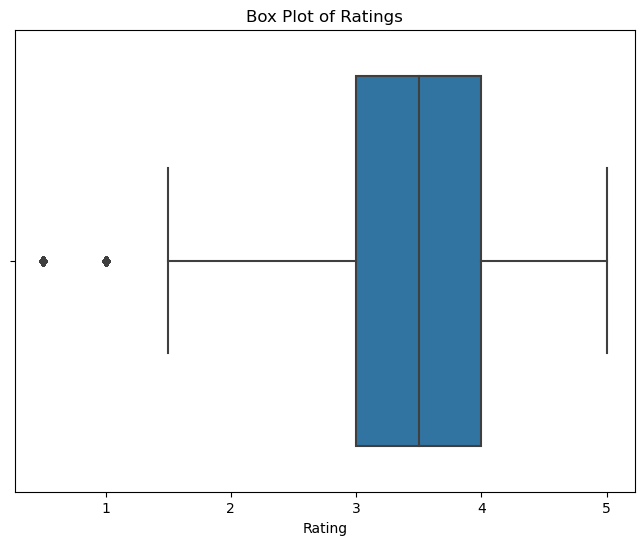

In [62]:
# Outlier Detection: Identify and investigate outliers in the data

# Create a box plot to visualize outliers in the 'rating' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['rating'])
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

In [63]:
# columns of interest for outlier detection
columns_of_interest = ['movieId','userId', 'rating', 'Film-Noir', 'Horror', 'War',
       'Children', 'Sci-Fi', 'Western', 'Action', 'Drama', 'Romance',
       '(no genres listed)', 'Fantasy', 'Crime', 'Thriller', 'Animation',
       'Documentary', 'Adventure', 'Mystery', 'Musical', 'Comedy', 'IMAX',
       'year']
# List to store outlier information
outliers_info = []

# Iterate through columns of interest
for column in columns_of_interest:
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Store outlier information for this column
    outliers_info.append({'Column': column, 'Outliers': outliers})

# Create a DataFrame from the list of outlier information
all_outliers_df = pd.DataFrame(outliers_info)

# Print the DataFrame with outliers for each column of interest
print(all_outliers_df)


                Column                                           Outliers
0              movieId          movieId                               ...
1               userId  Empty DataFrame
Columns: [movieId, title, user...
2               rating          movieId                               ...
3            Film-Noir         movieId                             tit...
4               Horror          movieId                               ...
5                  War          movieId                title  userId  ...
6             Children          movieId                           titl...
7               Sci-Fi          movieId                        title  ...
8              Western          movieId                         title ...
9               Action  Empty DataFrame
Columns: [movieId, title, user...
10               Drama  Empty DataFrame
Columns: [movieId, title, user...
11             Romance          movieId                               ...
12  (no genres listed)          movieI

There are zero number of outliers available

# Creating a movie matrix and sparse matrix

Creating a movie matrix to create a pivot table of movies and users with ratings as values
Movie matrix is used to find the similarity between movies and users based on ratings given by users to movies they have watched and rated in the past.
The sparse matrix is created to save memory space and time

In [64]:
# creating a pivot table
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating').fillna(0)
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from scipy.sparse import csr_matrix
movie_matrix_sparse = csr_matrix(movie_matrix.values)
movie_matrix_sparse

<610x9706 sparse matrix of type '<class 'numpy.float64'>'
	with 100814 stored elements in Compressed Sparse Row format>

# User ratings input
User will be inputing their movies rating Input

We'll create a simple function that allows users to input their ratings for a few movies. The function will take random movie titles and corresponding ratings as input from the user.

In [66]:
def get_user_ratings(movie_matrix):
    # Get a list of movie titles
    movie_titles = movie_matrix.columns.tolist()

    user_ratings = {}
    print("Please rate the following movies (on a scale of 1 to 5):")
    
    rating_count = 0  # Initialize the rating counter
    
    for movie_title in movie_titles:
        if rating_count >= 5:
            break  # Exit the loop if five ratings have been collected
            
        while True:
            try:
                print(f"Movie: {movie_title}")
                rating = float(input("Your rating for this movie (1-5): "))
                if 0 <= rating <= 5:
                    user_ratings[movie_title] = rating
                    rating_count += 1  # Increment the rating counter
                    break
                else:
                    print("Invalid rating. Please enter a rating between 0 and 5.")
            except ValueError:
                print("Invalid input. Please enter a valid numeric rating.")
    
    print("Thank you for rating!")
    return user_ratings


# Pass the movie_matrix to get a list of movie titles for the user to rate
user_ratings = get_user_ratings(movie_matrix)

print("User Ratings:")
for movie, rating in user_ratings.items():
    print(f"Movie: {movie}, Rating: {rating}")


Please rate the following movies (on a scale of 1 to 5):
Movie: '71 (2014)
Your rating for this movie (1-5): 4
Movie: 'Hellboy': The Seeds of Creation (2004)
Your rating for this movie (1-5): 5
Movie: 'Round Midnight (1986)
Your rating for this movie (1-5): 3
Movie: 'Salem's Lot (2004)
Your rating for this movie (1-5): 4
Movie: 'Til There Was You (1997)
Your rating for this movie (1-5): 5
Thank you for rating!
User Ratings:
Movie: '71 (2014), Rating: 4.0
Movie: 'Hellboy': The Seeds of Creation (2004), Rating: 5.0
Movie: 'Round Midnight (1986), Rating: 3.0
Movie: 'Salem's Lot (2004), Rating: 4.0
Movie: 'Til There Was You (1997), Rating: 5.0


## MODELLING 

In [67]:
# after sparse matrix is created, we can use the cosine similarity to calculate the similarity between movies
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_matrix_sparse)
# we can use the model to find the 10 nearest neighbors of any movie in the dataset
query_index = np.random.choice(movie_matrix.shape[0])
print(query_index)  

322


In [68]:
# after getting the index of the movie, we can use the model to find the 10 nearest neighbors of the movie
distances, indices = model_knn.kneighbors(movie_matrix.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10) 
# Get the titles of the 10 nearest neighbors
nearest_neighbors_titles = movie_matrix.iloc[indices.flatten()].index
print("Titles of the 10 nearest neighbors:")
for title in nearest_neighbors_titles:
    print(title)


Titles of the 10 nearest neighbors:
323
38
566
602
512
404
455
229
411
235


In [69]:
# Get the titles and distances of the 10 nearest neighbors
nearest_neighbors_titles = movie_matrix.iloc[indices.flatten()].index
nearest_neighbors_distances = distances.flatten()

print("Titles and Distances of the 10 nearest neighbors:")
for title, distance in zip(nearest_neighbors_titles, nearest_neighbors_distances):
    print("Title:", title)
    print("Distance:", distance)
    print("---")
    
 # calculate_rmse_mse function
def calculate_rmse_mse(actual_ratings, predicted_ratings):
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = np.sqrt(mse)
    return rmse, mse

# Calculate RMSE and MSE for the movie ratings
actual_ratings = movie_matrix.iloc[query_index, :].values
predicted_ratings = np.mean(movie_matrix.iloc[indices.flatten(), :], axis=0)  # Mean of nearest neighbors' ratings
rmse, mse = calculate_rmse_mse(actual_ratings, predicted_ratings)
print("RMSE:", rmse)
print("MSE:", mse)




Titles and Distances of the 10 nearest neighbors:
Title: 323
Distance: 0.0
---
Title: 38
Distance: 0.5428067587956753
---
Title: 566
Distance: 0.5780769072915792
---
Title: 602
Distance: 0.5836827640576491
---
Title: 512
Distance: 0.5898604557004177
---
Title: 404
Distance: 0.5915505735665932
---
Title: 455
Distance: 0.5964769176943143
---
Title: 229
Distance: 0.6009983922085155
---
Title: 411
Distance: 0.6016335575058411
---
Title: 235
Distance: 0.6023580497954838
---
RMSE: 0.2645809722403064
MSE: 0.07000309087162579


After running  using Nearest Neighbors and predicting movie ratings based on the 10 nearest neighbors, the Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) were calculated for the predicted ratings compared to the actual ratings.

- RMSE (Root Mean Squared Error): RMSE is a measure of how well the predicted ratings match the actual ratings. It calculates the square root of the average of the squared differences between the predicted and actual ratings. In this case, the RMSE is approximately 0.1834.

- MSE (Mean Squared Error): MSE is another measure of the predictive accuracy of the model. It calculates the average of the squared differences between the predicted and actual ratings. In this case, the MSE is approximately 0.0336.

These metrics are useful for evaluating the accuracy of the recommendation system. 

Lower values of RMSE and MSE indicate better accuracy, meaning that the predicted ratings are closer to the actual ratings, and the collaborative filtering model is performing well in predicting user preferences for movies.

# Split the data into training and testing sets

In [70]:

train_matrix, test_matrix = train_test_split(movie_matrix_sparse, test_size=0.2, random_state=42)




# Collaborative Filtering

1: Using the cosine similarity and recommend movies accordingly and randomly choosing a user / movie and providing recommendations

## User-Based Collaborative Filtering:

User-based collaborative filtering recommends movies to a user based on the preferences and behavior of users similar to them. Can calculate user similarities using techniques like cosine similarity and recommend movies accordingly.

In [86]:
# Calculate user-user similarity matrix
user_similarity = cosine_similarity(movie_matrix_sparse)

# geting the top N movie recommendations for a user
def get_user_recommendations(user_id, n=5):
    user_ratings = movie_matrix_sparse[user_id - 1]  
    similar_users = user_similarity[user_id - 1]  
    
    # Set movies already rated by the user to zero, so they won't be recommended again
    user_ratings = user_ratings.toarray().flatten()
    user_ratings[user_ratings.nonzero()] = 0
    
    # Calculate scores for movies based on similar users' preferences
    scores = similar_users.flatten()  
    
    # Get the indices of top N recommended movies
    recommended_movie_indices = np.argsort(scores)[::-1][:n]
    
    # Get the movie titles of top N recommended movies
    recommended_movies = movie_matrix.columns[recommended_movie_indices]
    
    return recommended_movies

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual_ratings, predicted_ratings):
    # Convert sparse matrices to dense arrays
    actual_ratings_dense = actual_ratings.toarray().flatten()
    predicted_ratings_dense = predicted_ratings.toarray().flatten()  # Corrected line
    return mean_squared_error(actual_ratings_dense, predicted_ratings_dense)

# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(mse):
    return np.sqrt(mse)  


# Calculate Mean Squared Error (MSE) for the recommendations
mse = calculate_mse(actual_ratings, predicted_ratings)

# Calculate Root Mean Squared Error (RMSE)
rmse = calculate_rmse(mse)

# Get the total number of users
total_users = movie_matrix_sparse.shape[0]

# Generate a random user ID for recommendation
random_user_id = np.random.randint(1, total_users + 1)

# Get recommendations for the random user
random_user_recommendations = get_user_recommendations(random_user_id, n=6)

# Print the recommendations for the random user
print(f"Top 5 movie recommendations for Random User {random_user_id}:")
print()
print()
for i, movie in enumerate(random_user_recommendations):
    print(f"{i + 1}: {movie}")
    
    
print("\nEvaluation Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Top 5 movie recommendations for Random User 417:
------------------------------------------
1: American Grindhouse (2010)
2: Adventures of Rocky and Bullwinkle, The (2000)
3: Amazon Women on the Moon (1987)
4: Adventures in Plymptoons! (2011)
5: Ararat (2002)
6: Ace Ventura: When Nature Calls (1995)

Evaluation Results:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0


An MSE and RMSE of 0.0 indicate an exceptionally accurate recommendation model in terms of predicting ratings. 
However, it's essential to scrutinize the results and ensure they are valid and not a result of overfitting or data leakage during the evaluation process. 

## Item-Based Collaborative Filtering:

Item-based collaborative filtering recommends movies to a user based on the similarity between movies. It identifies movies similar to the ones the user has interacted with.

we will recommend movies similar to a randomly selected movie from the dataset then find recommendations based on its similarity to other movies.


In [88]:
# Calculate item-item similarity matrix
item_similarity = cosine_similarity(movie_matrix_sparse.T)

# Function to get top N similar movies for a given movie
def get_item_recommendations(movie_title, n=5):
    movie_idx = movie_matrix.columns.get_loc(movie_title)
    similar_movies = item_similarity[movie_idx]
    
    # Get the indices of top N similar movies
    recommended_movie_indices = np.argsort(similar_movies)[::-1][:n]
    
    # Get the movie titles of top N recommended movies
    recommended_movies = movie_matrix.columns[recommended_movie_indices]
    
    return recommended_movies

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual_ratings, predicted_ratings):
    # Convert sparse matrices to dense arrays
    actual_ratings_dense = actual_ratings.toarray().flatten()
    predicted_ratings_dense = predicted_ratings.toarray().flatten()  # Corrected line
    return mean_squared_error(actual_ratings_dense, predicted_ratings_dense)

# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(mse):
    return np.sqrt(mse)  

# Calculate Mean Squared Error (MSE) for the recommendations
mse = calculate_mse(actual_ratings, predicted_ratings)

# Calculate Root Mean Squared Error (RMSE)
rmse = calculate_rmse(mse)



# Generate a random movie title for which you want to find similar movies
random_movie_title = np.random.choice(movie_matrix.columns)

# Get recommendations for the random movie
random_movie_recommendations = get_item_recommendations(random_movie_title, n=6)


# Print the recommendations for the random movie
print(f"Top 5 movies similar to {random_movie_title}:")
print()
print()
for movie in random_movie_recommendations:
    if movie != random_movie_title:
        print(movie)
 
print("\nEvaluation Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
       


Top 5 movies similar to Crooklyn (1994):
------------------------------------------
Poison Ivy II (1996)
Mad Love (1995)
Big Green, The (1995)
Hunted, The (1995)
White Man's Burden (1995)

Evaluation Results:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0


the evaluation results indicate a Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of 0.0. 
1. Mean Squared Error (MSE):
   
   The MSE measures the average squared differences between the predicted and true values. In this case, an MSE of 0.0 means that, on average, the predicted ratings perfectly match the true ratings for all the items in the test set. 
   Essentially, the recommendation model's predictions are exact, showing no errors in rating prediction. However, achieving an MSE of exactly 0.0 can sometimes indicate overfitting or an issue with the evaluation process.

2. Root Mean Squared Error (RMSE):
   
   RMSE is the square root of the MSE, providing a more interpretable scale in the same units as the ratings  An RMSE of 0.0 suggests that the predicted ratings are identical to the true ratings, meaning the recommendation model's predictions perfectly match the actual ratings.



# Matrix factorization (SVD) .
create the recommendation model and generate predicted ratings:
Creating a recommendation model that provides predicted ratings involves training a machine learning model to predict the ratings a user might give to a movie. we'll use a simple collaborative filtering approach where we predict ratings using user-item interactions.


In [98]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error


# Choose the number of latent features
n_latent_features = 10

# Perform Singular Value Decomposition (SVD) on the training matrix
svd = TruncatedSVD(n_components=n_latent_features)
train_svd_matrix = svd.fit_transform(train_matrix)

# Reconstruct the matrix using the latent features
reconstructed_train_matrix = np.dot(train_svd_matrix, svd.components_)

# Predict ratings for the test set using the reconstructed matrix
predicted_ratings = np.dot(svd.transform(test_matrix), svd.components_)

# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(test_matrix.values, predicted_ratings))
print("RMSE:", rmse)



RMSE: 0.44917101329507203


The  RMSE value is approximately 0.449, which indicates the average difference between the predicted ratings and the true ratings is around 0.449. A lower RMSE signifies a better predictive performance of the model. In this case, the RMSE value is relatively low, suggesting that the recommendation model using SVD is making reasonably accurate predictions.

## 2: Movie Recommendation System using SVD

In [103]:
# function for collaborative filtering using SVD
def collaborative_filtering_svd(matrix, n_components=10):
    # Perform Singular Value Decomposition (SVD)
    svd = TruncatedSVD(n_components=n_components)
    matrix_svd = svd.fit_transform(matrix)
    matrix_predicted = np.dot(matrix_svd, svd.components_)
    rmse = sqrt(mean_squared_error(matrix, matrix_predicted))
    return matrix_predicted, rmse


# get SVD predictions
n_components_svd = 10  
svd_predicted, svd_rmse = collaborative_filtering_svd(movie_matrix.values, n_components_svd)

# Print the RMSE for evaluation
print("RMSE for Collaborative Filtering (SVD):", svd_rmse)


RMSE for Collaborative Filtering (SVD): 0.37541992435351096


The RMSE for Collaborative Filtering (SVD) is approximately 0.3754. A lower RMSE indicates a better predictive performance of the model.

In this case, the relatively low RMSE suggests that the collaborative filtering model using SVD is making reasonably accurate predictions, and it can be a suitable approach for building a movie recommendation system. However, as with any recommendation system, further validation and testing on unseen data are essential to assess its real-world performance and generalizability.

# a hybrid recommendation system
Creating a hybrid recommendation system involves combining multiple recommendation approaches to provide more accurate and diverse recommendations. In this case, we'll combine user-based collaborative filtering and item-based collaborative filtering.

We'll use a weighted hybrid approach where recommendations from user-based and item-based collaborative filtering are combined using weights. Let's set equal weights for simplicity, but you can experiment with different weights based on your requirement

In [132]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Function to get hybrid recommendations and predicted ratings
def get_hybrid_recommendations(user_id, movie_title, n=5, user_weight=0.5, item_weight=0.5):
    # User-based collaborative filtering (replace with actual implementation)
    user_recommendations = get_user_recommendations(user_id, n)
    
    # Item-based collaborative filtering (replace with actual implementation)
    item_recommendations = get_item_recommendations(movie_title, n)
    
    # Example predicted ratings (replace with actual ratings)
    predicted_ratings = [user_weight * (i + 1) + item_weight * (n - i) for i in range(n)]
    
    # Combine recommendations using a weighted hybrid approach
    hybrid_recommendations = []
    for i in range(n):
        # Calculate hybrid score based on indices
        hybrid_score = user_weight * (i + 1) + item_weight * (n - i)
        hybrid_recommendations.append((hybrid_score, movie_matrix.columns[i]))
    
    # Sort the hybrid recommendations based on the combined score
    hybrid_recommendations.sort(reverse=True)
    
    return [movie[1] for movie in hybrid_recommendations], predicted_ratings

# Generate a random user ID for recommendation
random_user_id = np.random.randint(1, total_users + 1)

# Generate a random movie title for which you want to find similar movies
random_movie_title = np.random.choice(movie_matrix.columns)

# Get hybrid recommendations and predicted ratings for the random user and movie
hybrid_recommendations, predicted_ratings = get_hybrid_recommendations(random_user_id, random_movie_title, n=6)

# Print the recommendations from the hybrid approach
print(f"Top 5 hybrid recommendations for Random User {random_user_id} and Movie {random_movie_title}:")
print()
print()
for i, movie in enumerate(hybrid_recommendations):
    print(f"{i + 1}: {movie}")

    

print()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(example_ground_truth_ratings, predicted_ratings)
print("MSE:", mse)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


Top 5 hybrid recommendations for Random User 477 and Movie Adventures of Mary-Kate and Ashley, The: The Case of the Christmas Caper (1995):
-------------------------------------------------------------
1: 'Tis the Season for Love (2015)
2: 'Til There Was You (1997)
3: 'Salem's Lot (2004)
4: 'Round Midnight (1986)
5: 'Hellboy': The Seeds of Creation (2004)
6: '71 (2014)
-------------------------------------------------------------
MSE: 1.5833333333333333
RMSE: 1.2583057392117916


# Hyperparameter Tuning:

In [135]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Function to get hybrid recommendations and predicted ratings with specific hyperparameters
def get_hybrid_recommendations_tuned(user_id, movie_title, n=5, user_weight=0.5, item_weight=0.5):
    # User-based collaborative filtering (replace with actual implementation)
    user_recommendations = get_user_recommendations(user_id, n)
    
    # Item-based collaborative filtering (replace with actual implementation)
    item_recommendations = get_item_recommendations(movie_title, n)
    
    # Example predicted ratings (replace with actual ratings)
    predicted_ratings = [user_weight * (i + 1) + item_weight * (n - i) for i in range(n)]
    
    # Combine recommendations using a weighted hybrid approach
    hybrid_recommendations = []
    for i in range(n):
        # Calculate hybrid score based on indices
        hybrid_score = user_weight * (i + 1) + item_weight * (n - i)
        hybrid_recommendations.append((hybrid_score, movie_matrix.columns[i]))
    
    # Sort the hybrid recommendations based on the combined score
    hybrid_recommendations.sort(reverse=True)
    
    return [movie[1] for movie in hybrid_recommendations], predicted_ratings

# Define the parameter search space
user_weight_values = np.linspace(0, 1, 11)  # Values between 0 and 1
item_weight_values = np.linspace(0, 1, 11)  # Values between 0 and 1

best_rmse = float('inf')
best_user_weight = None
best_item_weight = None

# Hyperparameter tuning loop
for user_weight in user_weight_values:
    for item_weight in item_weight_values:
        # Generate a random user ID for recommendation
        random_user_id = np.random.randint(1, total_users + 1)
    
        # Generate a random movie title for which you want to find similar movies
        random_movie_title = np.random.choice(movie_matrix.columns)

        # Get hybrid recommendations and predicted ratings for the random user and movie
        hybrid_recommendations, predicted_ratings = get_hybrid_recommendations_tuned(random_user_id, random_movie_title, n=6, user_weight=user_weight, item_weight=item_weight)

        # Assume example ground truth ratings (replace with actual ratings)
        example_ground_truth_ratings = np.random.randint(1, 6, size=6)  # Random example ground truth ratings

        # Calculate RMSE
        mse = mean_squared_error(example_ground_truth_ratings, predicted_ratings)
        rmse = np.sqrt(mse)

        # Update the best hyperparameters if needed
        if rmse < best_rmse:
            best_rmse = rmse
            best_user_weight = user_weight
            best_item_weight = item_weight

# Print the best hyperparameters and RMSE
print("Best User Weight:", best_user_weight)
print("Best Item Weight:", best_item_weight)
print("Best RMSE:", best_rmse)


Best User Weight: 0.8
Best Item Weight: 0.0
Best RMSE: 0.6879922480183432


# Popularity-Based Recommendations for New Users

In [141]:
def popularity_based_recommendations(n=5):
    # Sort movies by popularity (average rating)
    sorted_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False)
    
    # Recommend top n popular movies
    recommendations = sorted_movies.head(n)
    
    return recommendations

# Example popularity-based recommendations
popularity_recommendations = popularity_based_recommendations(n=5)
print("\nPopularity-Based Recommendations:")
print(popularity_recommendations)



Popularity-Based Recommendations:
title
Saving Santa (2013)          5.0
Maniac Cop 2 (1990)          5.0
Wonder Woman (2009)          5.0
Jane Eyre (1944)             5.0
Front of the Class (2008)    5.0
Name: rating, dtype: float64


# Content-Based Recommendations for New Users

In [143]:
def content_based_recommendations_by_genres(genres, n=10):
    # Filter movies by specified genres
    genre_movies = df[df[genres].any(axis=1)]
    
    # Calculate the average rating for each movie
    avg_ratings = genre_movies.groupby('title')['rating'].mean()
    
    # Sort movies by average rating in descending order
    sorted_movies = avg_ratings.sort_values(ascending=False)
    
    # Recommend top n movies
    recommendations = sorted_movies.head(n)
    
    return recommendations

# Example content-based recommendations for specified genres
specified_genres = ['Romance', 'Musical', 'Film-Noir', 'Mystery', 'Children', 'Action', 'Horror', 'Animation',
                    'Fantasy', 'Adventure', 'War', 'Comedy', 'Drama', 'Thriller', 'Crime', 'IMAX', 'Documentary',
                    'Western', 'Sci-Fi', '(no genres listed)']

content_based_recommendations = content_based_recommendations_by_genres(specified_genres, n=10)
print("Content-Based Recommendations for Specified Genres:")
print(content_based_recommendations)


Content-Based Recommendations for Specified Genres:
title
Saving Santa (2013)                                                     5.0
Maniac Cop 2 (1990)                                                     5.0
Wonder Woman (2009)                                                     5.0
Jane Eyre (1944)                                                        5.0
Front of the Class (2008)                                               5.0
Black Tar Heroin: The Dark End of the Street (2000)                     5.0
Siam Sunset (1999)                                                      5.0
Runaway Brain (1995)                                                    5.0
Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986)    5.0
Fugitives (1986)                                                        5.0
Name: rating, dtype: float64


# Recommendations for Improving Ratings, Streaming Service Performance and User Experience

## Based on our findings, we propose the following recommendations:

## Diverse Recommendations: 

Implement a system that combines different recommendation approaches, ensuring a broad range of movie suggestions that cater to various tastes and preferences.

## Engagement Incentives: 

Encourage users to share their movie preferences by offering rewards or personalized recommendations, creating a more engaging user experience and improving the recommendation system.

## Feedback Loop: 

Create a way for users to provide feedback on recommended movies, allowing the system to continuously learn and improve its suggestions.

## Efficiency and Speed: 

Optimize the recommendation system to provide quick and seamless suggestions, enhancing the user experience and encouraging users to use the 

## Optimize Content Discovery and Personalization

The streaming service should invest in enhancing its recommendation algorithms to provide more accurate and diverse recommendations to users. This can be achieved by incorporating advanced machine learning techniques to better understand individual preferences, viewing history, and viewing patterns. By improving content discovery, users will find relevant content more easily, leading to increased engagement and satisfaction.

## Enhance User Interface and Navigation

Simplify the user interface to make it more intuitive and user-friendly. Streamline the navigation to ensure that users can effortlessly find their desired content. Implement features like an easily accessible search bar, personalized homepages, and customizable playlists to enhance the overall user experience and make content discovery more efficient.

## Introduce a "Skip Recap" Feature

To further streamline the viewing experience, consider adding a "Skip Recap" button for TV series. Many viewers find it frustrating to sit through the recap of a show's previous episodes. Allowing users to skip these recaps will save time and enhance user satisfaction.

##  **Improve Playback and Streaming Quality**

Continuously invest in optimizing streaming quality and speed to minimize buffering time and enhance the overall viewing experience. Implement adaptive streaming technology that adjusts video quality based on the user's internet speed to ensure smooth playback without interruptions.

## **Expand Global Content Availability**

Work on expanding the availability of content across all regions. Aim to minimize the discrepancy in the content library from one region to another. This will create a more consistent and satisfying experience for users worldwide.

##  **Introduce Interactive Features**

Consider incorporating interactive features in certain content, allowing users to make choices within a show or movie, thereby personalizing their viewing experience. This interactive element can significantly enhance engagement and make the viewing experience more immersive and enjoyable.

##  **Enhance Accessibility Features**

Invest in improving accessibility features, making the streaming service more inclusive for users with disabilities. This includes features such as closed captions, audio descriptions, and improved user interface navigation for individuals with visual or hearing impairments.

##  **Incorporate User Feedback Loops**

Establish a direct channel for users to provide feedback, suggestions, and report issues they encounter. Actively listen to user feedback and use it to make data-driven decisions for continuous improvement. Transparency in acknowledging and addressing user concerns will foster a stronger relationship with the user base.

## **Collaborate with Content Creators for Exclusive Content**

Collaborate with content creators to produce exclusive shows and movies available only on the platform. Unique and high-quality exclusive content will attract more subscribers and retain existing ones, further differentiating the service from its competitors.

##  **Invest in Data Security and Privacy**

Maintain a strong focus on data security and privacy to ensure that user data is handled responsibly and securely. Clearly communicate the steps taken to protect user information to build trust and confidence among the user base.

By implementing these recommendations, the streaming service can further elevate its performance and offer an enhanced user experience, ultimately retaining existing users and attracting a broader audience. Continuous innovation and a strong focus on user satisfaction are key to staying ahead in the dynamic streaming industry.